In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X=2 * np.random.rand(100,1)
y=6 + 4 * X + np.random.randn(100,1)

plt.scatter(X,y)

In [ ]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred
  
  w0_factors = np.ones((N,1))
  
  w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
  w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
  
  return w1_update, w0_update

def gradient_descent_steps(X,y,iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
    
  return w1,w0

def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:3f} w0:{1:3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:4f}'.format(get_cost(y,y_pred)))

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred)


In [ ]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0
  
  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
    
  return w1, w0

w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1:", round(w1[0,0],3) , "w0:" , round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:4f}'.format(get_cost(y,y_pred)))


In [3]:
from sklearn.linear_model import LinearRegression


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

bostonDF.info()


Boston 데이터 세트 크기 :  (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


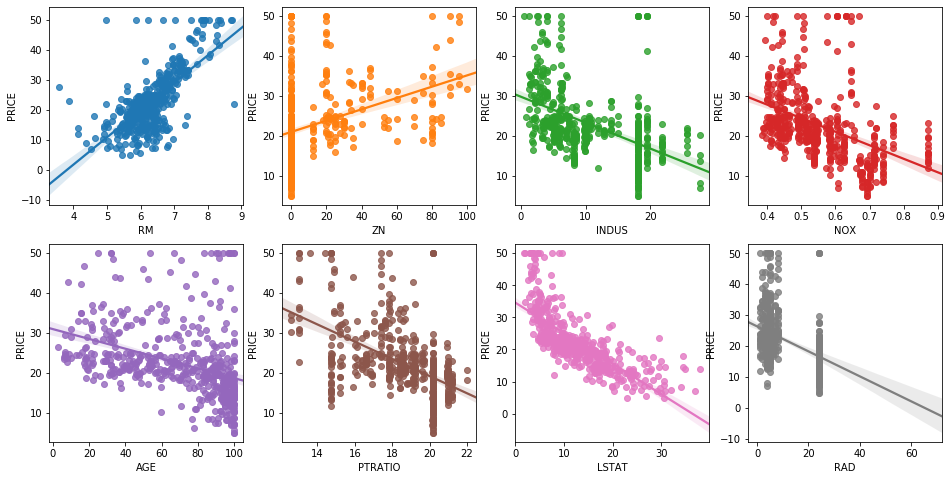

In [4]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i % 4
  sns.regplot(x=feature, y='PRICE', data=bostonDF,ax=axs[row][col])
  
